In [28]:
import osmnx as ox
import geopandas as gpd

# Configurar lugar y consulta
place = 'Haryana, India'
tags = {'natural': 'water', 'water': 'lake'}

# Descargar datos usando OSMnx
lakes = ox.geometries_from_place(place, tags)

# Filtrar columnas relevantes
lakes = lakes[['name', 'geometry']]

ox.settings.log_console = True  # Muestra el log en consola en vez de en un archivo
ox.settings.use_cache = False   # Desactiva el uso del cache que guarda los archivos JSON

# Guardar a un archivo GeoJSON (opcional)
# lakes.to_file('india_lakes.geojson', driver='GeoJSON')

# # Mostrar los primeros registros
# print(lakes.head())

# # Visualización con geopandas
# lakes.plot(figsize=(10, 10), edgecolor='k')


C:\Users\agand\AppData\Local\Temp\ipykernel_3780\3198443230.py:9: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  lakes = ox.geometries_from_place(place, tags)
c:\Users\agand\OneDrive\Escritorio\lakes\lake-algae-analysis\.venv\Lib\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 30 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [27]:

lakes = lakes[lakes["name"].notna()]
print(lakes.columns)
print(len(lakes))

Index(['name', 'geometry'], dtype='object')
114


                                  name  \
element_type osmid                       
way          35310140   Sultanpur Lake   
             132867697             NaN   
             132867708             NaN   
             132867712             NaN   
             132867718             NaN   

                                                                 geometry  
element_type osmid                                                         
way          35310140   POLYGON ((76.89223 28.46749, 76.89456 28.46779...  
             132867697  POLYGON ((76.83965 28.30577, 76.83960 28.30569...  
             132867708  POLYGON ((76.84030 28.29981, 76.84039 28.29981...  
             132867712  POLYGON ((77.07351 28.25319, 77.07353 28.25323...  
             132867718  POLYGON ((77.00279 28.08726, 77.00277 28.08728...  


<Axes: >

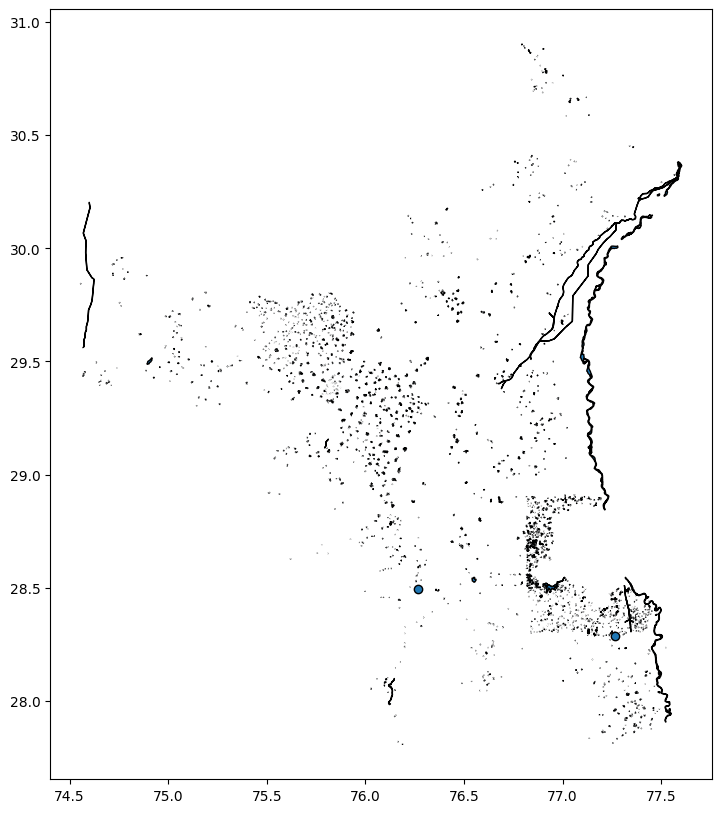

In [29]:
# Guardar a un archivo GeoJSON (opcional)
lakes.to_file('india_lakes.geojson', driver='GeoJSON')

# Mostrar los primeros registros
print(lakes.head())

# Visualización con geopandas
lakes.plot(figsize=(10, 10), edgecolor='k')



In [17]:
lakes.name.unique()

array(['Sultanpur Lake', 'The Nest Lake - PedalYatris',
       'Shiv Temple pond', 'Leisure Valley', 'Fountain Pond',
       'Pond Prima', 'water=pond', 'Johad', 'Najafgarh Jheel',
       'Waterlogged marsh', 'Marshes', 'Man made pond', 'marshes',
       'Sikandarpur Pond', 'Karna Lake', 'Sannihit Sarovar',
       'Gurdwara Chhevin Patshahi', 'Bheeshma Kund',
       'Cantonment Board Lake', 'Village Johad', 'Tikkar Taal',
       'Mallah Lake', 'Sherla taal', 'Adi Badri Pond', 'Yamuna River',
       'Damdama Lake', 'Water Tank', 'Bahari Talab', 'Badkhal Lake',
       'The Lost Lake Pedal Yatri', 'Square Lake', 'Neeli Jheel',
       'Bada Jhod', 'Death Valley', 'Jhumri Tilaiya', 'Misty Lake',
       'Bhati Mines Lake', 'Common Swimming Pool', 'LuLu Lake - PY',
       'The Betal Lake - Pedalyatri', 'Kathouta Lake (कठौता झील)',
       'Tinku Jiya Lake', 'Lake Baikal', 'Dhak Chic Lake', 'natural lake',
       'natural', 'Natural pond', 'swimmig pool', 'Jadra Lake',
       'Shri Shyam Baba D

In [18]:
type(lakes)

geopandas.geodataframe.GeoDataFrame

In [19]:
lakes.columns

Index(['name', 'geometry'], dtype='object')

In [20]:
lakes.sort_values(by="name")

name  \
element_type osmid                                      
way          184555751   1st water works Bawani Khera   
             1269866856  2nd water works Bawani Khera   
             870837093                    ATTELA POND   
             1024462952                Adi Badri Pond   
             699150195                  Apu Ghar Lake   
...                                               ...   
             1189647741                    water=pond   
             1189647522                    water=pond   
             1189646575                    water=pond   
             1190138994                    water=pond   
             1189655657                    water=pond   

                                                                  geometry  
element_type osmid                                                          
way          184555751   POLYGON ((76.04238 28.93528, 76.04111 28.93567...  
             1269866856  POLYGON ((76.03325 28.96151, 76.03191 28.96150...  
             870837093   POLYGON ((76.29078 29.84602, 76.29108 29.84659...  
             1024462952  POLYGON ((77.33988 30.45358, 77.34063 30.45325...  
             699150195   POLYGON ((76.58789 28.89853, 76.58867 28.89832...  
...                                                                    ...  
             1189647741  POLYGON ((77.37745 28.35806, 77.37777 28.35802...  
             1189647522  POLYGON ((77.37073 28.36059, 77.37122 28.36039...  
             1189646575  POLYGON ((77.42623 28.32728, 77.42653 28.32712...  
             1190138994  POLYGON ((76.92207 28.36155, 76.92275 28.36162...  
             1189655657  POLYGON ((76.88119 28.33643, 76.88129 28.33644...  

[114 rows x 2 columns]

In [13]:
lakes.name.unique()

array(['New Lake Sector 42', 'pond 1', 'Sukhna Lake'], dtype=object)

In [22]:
print(lakes[lakes.name =="1st water works Bawani Khera"].geometry)

element_type  osmid    
way           184555751    POLYGON ((76.04238 28.93528, 76.04111 28.93567...
Name: geometry, dtype: geometry


In [23]:
lakes[lakes.name =="1st water works Bawani Khera"].geometry

element_type  osmid    
way           184555751    POLYGON ((76.04238 28.93528, 76.04111 28.93567...
Name: geometry, dtype: geometry